# Ant Colony Optimization based Itinerary Recommender

## "The title is pretty much self-explanatory. We will be following the ACO framework shown below:"

###### ACO Framework 

% Create Graph

% Draw Graph

%% ACO algorithm
    % Define Initial Parameters
    % Main loop
    
    for i = 1 to max_iter:
        % Create ants
        % Calculate fitness value of all ants
        % Find the best ant 
        % Update the pheromone matrix
        % Implement Evaporation
        % Display results 
    end

In [1]:
# Import the libraries 

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Import the dataset
top_dests_nepal=pd.read_csv("destinations_of_nepal_updated_with_latlong.csv")

In [3]:
print(top_dests_nepal.head())

                   title  avg_rating  voted_by                genre  history  \
0       Boudhanath Stupa         4.5      8897  ['Religious Sites']     True   
1  Phewa Tal (Fewa Lake)         4.5      2988  ['Bodies of Water']    False   
2              Sarangkot         4.5      2199        ['Mountains']    False   
3   Swayambhunath Temple         4.5      6203  ['Religious Sites']     True   
4              Poon Hill         4.5      1477        ['Mountains']    False   

   art_and_architecture  nature  adventure  entertainment  \
0                  True   False      False          False   
1                 False    True      False          False   
2                 False    True      False          False   
3                  True   False      False          False   
4                 False    True      False          False   

   health_and_lifestyle   food  industries  religious   latitude  longitude  
0                 False  False       False       True  27.721506  85.35980

In [4]:
# select the first 90 destinations as they're the destinations having the latitude and longitude currently
# should have been 100 but there is some error in the data from the 91th record onwards
top_dests_nepal=top_dests_nepal[:90]

In [5]:
print(top_dests_nepal.tail())

                              title  avg_rating  voted_by  \
85  Kedareshwar Mahadev Mani Temple         4.0         8   
86                  Makwanpur Gadhi         4.5        11   
87                 Dudh Koshi River         5.0        18   
88                     Machapuchare         5.0        81   
89                    Mt Ama Dablam         5.0        36   

                  genre  history  art_and_architecture  nature  adventure  \
85  ['Religious Sites']     True                  True   False      False   
86   ['Historic Sites']     True                  True   False      False   
87  ['Bodies of Water']    False                 False    True      False   
88        ['Mountains']    False                 False    True      False   
89        ['Mountains']    False                 False    True      False   

    entertainment  health_and_lifestyle   food  industries  religious  \
85          False                 False  False       False       True   
86          False       

In [6]:
# since we'll be dealing only with latitude and longitude at the moment
# only filter those columns along with the title
print(top_dests_nepal[['title','latitude','longitude']])

                              title   latitude  longitude
0                  Boudhanath Stupa  27.721506  85.359809
1             Phewa Tal (Fewa Lake)  28.211627  83.932296
2                         Sarangkot  28.244376  83.944564
3              Swayambhunath Temple  27.714930  85.288146
4                         Poon Hill  28.400195  83.671789
..                              ...        ...        ...
85  Kedareshwar Mahadev Mani Temple  25.411722  70.395631
86                  Makwanpur Gadhi  27.408161  84.989223
87                 Dudh Koshi River  27.383559  86.299977
88                     Machapuchare  28.504372  83.929539
89                    Mt Ama Dablam  27.861873  86.843653

[90 rows x 3 columns]


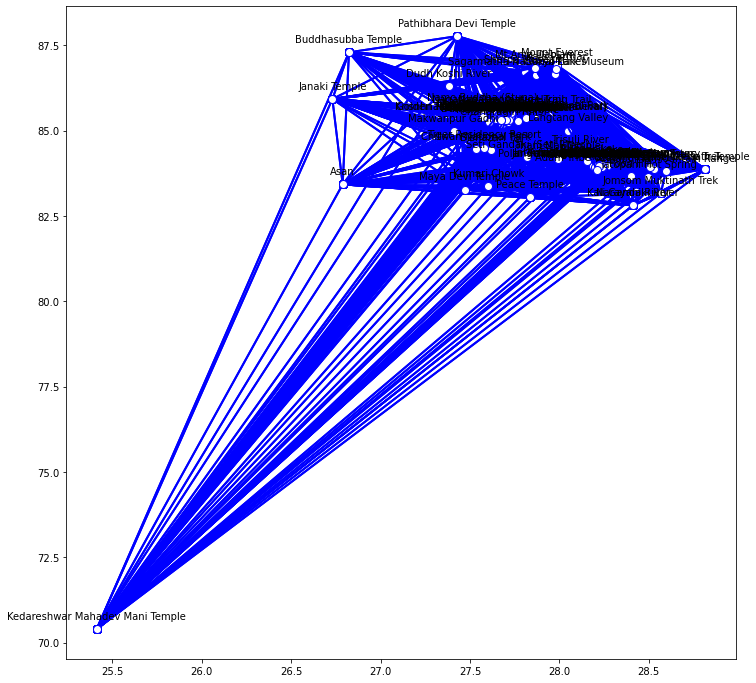

In [7]:
# let's plot the graph again 
%matplotlib inline 
plt.figure(figsize=(12,12)) 

for lat,long in zip(top_dests_nepal['latitude'],top_dests_nepal['longitude']):
    
    for another_lat,another_long in zip(top_dests_nepal['latitude'],top_dests_nepal['longitude']):
        
        # create a list holding the two latitude
        lat_list=[lat,another_lat]
        # also create a list holding the two longitudes 
        long_list=[long,another_long]
        plt.plot(lat_list,long_list,color='blue', marker='o', linestyle='solid',linewidth=2, markersize=8,mfc = 'white')
#     plt.plot(lat_list,top_n_dests['longitude'],color='blue', marker='o', linestyle='solid',linewidth=2, markersize=8,mfc = 'white')

for title,x,y in zip(top_dests_nepal['title'],top_dests_nepal['latitude'],top_dests_nepal['longitude']):

    label = "{}".format(title)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [8]:
print(top_dests_nepal[top_dests_nepal['latitude']<25.5])

                              title  avg_rating  voted_by  \
85  Kedareshwar Mahadev Mani Temple         4.0         8   

                  genre  history  art_and_architecture  nature  adventure  \
85  ['Religious Sites']     True                  True   False      False   

    entertainment  health_and_lifestyle   food  industries  religious  \
85          False                 False  False       False       True   

     latitude  longitude  
85  25.411722  70.395631  


In [9]:
# let's remove this for better visualization and better result
top_dests_nepal=top_dests_nepal.drop(top_dests_nepal[top_dests_nepal['latitude']<25.5].index)

In [26]:
# let's just pick n=5 for now for better visualization
n=10 #graph size
top_n_dests=top_dests_nepal[:n]

In [27]:
def plot_graph(ax,fig):
    """
        Function to plot the graph of matrix for every edge between the given nodes
    """

    for lat,long in zip(top_n_dests['latitude'],top_n_dests['longitude']):
        for another_lat,another_long in zip(top_n_dests['latitude'],top_n_dests['longitude']):

            # create a list holding the two latitude
            lat_list=[lat,another_lat]
            # also create a list holding the two longitudes 
            long_list=[long,another_long]

            ax.plot(lat_list,long_list,color='blue', marker='o', linestyle='solid',linewidth=2, markersize=8,mfc = 'white')
            #     plt.plot(lat_list,top_n_dests['longitude'],color='blue', marker='o', linestyle='solid',linewidth=2, markersize=8,mfc = 'white')
            fig.canvas.draw()
            
    #adding label to each node
    for title,x,y in zip(top_n_dests['title'],top_n_dests['latitude'],top_n_dests['longitude']):

        label = "{}".format(title)

        ax.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(-5,5), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center



In [28]:
# also meanwhile let's create a matrix called 'graph' to store the weights for each edges
graph=np.zeros((n,n))

def create_graph():

    # iterators to iterate through the graph
    i=0
    j=0

    for lat,long in zip(top_n_dests['latitude'],top_n_dests['longitude']):
        j=0
        for another_lat,another_long in zip(top_n_dests['latitude'],top_n_dests['longitude']):
            #edge weight(Euclidean distance)
            distance_between_the_places=np.sqrt((lat-another_lat)**2+(long-another_long)**2)
            #print(distance_between_the_places)

            #and store it in the 'graph' matrix
            graph[i][j]=distance_between_the_places
            #increment j 
            j+=1

        #increment i
        i+=1

In [29]:
create_graph()
print(graph)

[[0.         1.50930821 1.5087443  0.07196422 1.8193486  2.31453205
  0.01730239 0.06968042 0.17686667 1.57045333]
 [1.50930821 0.         0.03497192 1.44396558 0.32159262 0.96033372
  1.50038779 1.46293608 1.36579118 2.98355323]
 [1.5087443  0.03497192 0.         1.44413428 0.31414328 0.98473932
  1.50017083 1.46360895 1.36778619 2.97396201]
 [0.07196422 1.44396558 1.44413428 0.         1.7556188  2.24330824
  0.05852919 0.02843898 0.1065738  1.64220247]
 [1.8193486  0.32159262 0.31414328 1.7556188  0.         0.84046696
  1.81119303 1.77558953 1.68087869 3.2618107 ]
 [2.31453205 0.96033372 0.98473932 2.24330824 0.84046696 0.
  2.30182319 2.25521205 2.14666762 3.86228417]
 [0.01730239 1.50038779 1.50017083 0.05852919 1.81119303 2.30182319
  0.         0.05283009 0.16134162 1.58546727]
 [0.06968042 1.46293608 1.46360895 0.02843898 1.77558953 2.25521205
  0.05283009 0.         0.11033245 1.63665967]
 [0.17686667 1.36579118 1.36778619 0.1065738  1.68087869 2.14666762
  0.16134162 0.11033

In [30]:
# Define the initial parameters of ACO
max_iter=100 #max no of iterations
ant_no=10 #number of ants 

#initial pheromone concentration
tau_0=10*1/(n*np.mean(graph))

#initial pheromone matrix
tau = tau_0*np.ones((n,n))
print("Initial pheromone matrix (Tau):")
print(tau)

#desirability/quality of each edge,eta
eta=1/graph #inverse of cost (distance)
print("Desirability matrix (Eta):")
print(eta)

rho=0.05 #evaporation rate
alpha=1 #pheromone exponential parameter
beta=1 #edge desirabiltu/quality exponential parameter


Initial pheromone matrix (Tau):
[[0.82995522 0.82995522 0.82995522 0.82995522 0.82995522 0.82995522
  0.82995522 0.82995522 0.82995522 0.82995522]
 [0.82995522 0.82995522 0.82995522 0.82995522 0.82995522 0.82995522
  0.82995522 0.82995522 0.82995522 0.82995522]
 [0.82995522 0.82995522 0.82995522 0.82995522 0.82995522 0.82995522
  0.82995522 0.82995522 0.82995522 0.82995522]
 [0.82995522 0.82995522 0.82995522 0.82995522 0.82995522 0.82995522
  0.82995522 0.82995522 0.82995522 0.82995522]
 [0.82995522 0.82995522 0.82995522 0.82995522 0.82995522 0.82995522
  0.82995522 0.82995522 0.82995522 0.82995522]
 [0.82995522 0.82995522 0.82995522 0.82995522 0.82995522 0.82995522
  0.82995522 0.82995522 0.82995522 0.82995522]
 [0.82995522 0.82995522 0.82995522 0.82995522 0.82995522 0.82995522
  0.82995522 0.82995522 0.82995522 0.82995522]
 [0.82995522 0.82995522 0.82995522 0.82995522 0.82995522 0.82995522
  0.82995522 0.82995522 0.82995522 0.82995522]
 [0.82995522 0.82995522 0.82995522 0.82995522 0.

/tmp/ipykernel_293554/3981180087.py:14: RuntimeWarning: divide by zero encountered in true_divide
  eta=1/graph #inverse of cost (distance)


In [31]:
print(tau[2,:]**alpha)

[0.82995522 0.82995522 0.82995522 0.82995522 0.82995522 0.82995522
 0.82995522 0.82995522 0.82995522 0.82995522]


In [32]:
print(eta[2,:]**beta)

[ 0.66280284 28.59436933         inf  0.69245638  3.18326079  1.01549718
  0.66659075  0.68324261  0.73110842  0.33625177]


## Now moving on to the main loop of ACO

In [33]:
# defining a function to create the ant colony 
def create_colony(graph,node_no,ant_no,tau,eta,alpha,beta):
    """
        creates an ant colony
    """
    # create a list called 'colony'
    # inside it, there will be ants ( represented by the indices)
    # each position contains other list called 'tour' that contains
    # the tour completed by each ant
    colony=[[] for _ in range(ant_no)] #size of the colony=no of ants
    
    # Run iterations equal to the number of ants 
    for i in range(ant_no):
        
        # define the initial node
        # we should take it as a parameter actually 
        # but let's take it random for now
        initial_node=np.random.randint(0,node_no)
        colony[i].append(initial_node)
        
        for j in range(node_no-1):
            #to choose the rest of the nodes
            
            #current node is the last node in the list
            current_node=int(colony[i][-1])
#             print("current node:",current_node)
            
            #use the following formula to calculate the probability 
            p_all_nodes=(tau[current_node,:]**alpha)*(eta[current_node,:]**beta)
#             print("Prob:",p_all_nodes)
            
            #make the probability of the visited nodes 0
#             print("colony:",colony)
            for node in colony[i]:
                p_all_nodes[node]=0
                
            #calculate the final probability
            p=p_all_nodes/np.sum(p_all_nodes)
            
            #Note: 'p'is a vector having size (1,node_no)   
#             print("probability vector:",p)
            
            #select the next node based on roulette wheel
            next_node=roulette_wheel(p)
            
            #append next node to the tour 
            #made by the ant in the colony
            colony[i].append(next_node)
            
        # to complete the tour, 
        # add the initial node to the end as well
        
        colony[i].append(initial_node)
    return colony

In [34]:
# let's implement the roulette wheel function
def roulette_wheel(prob_vec):
    """
        Selects the next node based on 
        the cumulative sum of the probabilities 
        in the probability vector
    """
    #cumulative version of the prob_vec (p)
    
    cum_sum_p=np.cumsum(prob_vec)
    
    #choose a random value from 0 to 1
    random_val=np.random.rand()
#     print("random value:",random_val)
    
    #choose the first index as next_node in the probability vector
    #that has value more or equal to the random_val
    
#     print("cum sum:",cum_sum_p)
    
    next_node = np.argwhere(cum_sum_p>=random_val)[0][0]
    
    #return the next_node
    return next_node
    

### Now. let's define a function that calculates the fitness value of the route calculated

In [35]:
def fitness_function(tour,graph):
    """
        calculates the fitness of the tour
        > basically, it's the sum of cost of all edges
        in the tour.
    """
    fitness=0
    
    for i in range(len(tour)-1):
        
        current_node=tour[i] # current node
        next_node=tour[i+1] # next node
        
        # add the cost of current edge (current_node->next_node)
        # to the overall fitness
        
        fitness = fitness + graph[current_node][next_node]
        
    return fitness

### And a function to draw Pheromone graph

In [ ]:
def draw_pheromone(ax,fig,tau,graph):
    """
        Draws pheromone graph
    """
    ax.clear()

    # Maximum value of pheromone
    max_tau=np.max(tau)
    # Minimum value of pheromone
    min_tau=np.min(tau)
    
    # Normalize the tau matrix
    tau_normalized = (tau - min_tau)/(max_tau - min_tau)
    for lat,long,i in zip(top_n_dests['latitude'],top_n_dests['longitude'],range(len(graph))):
        for another_lat,another_long,j in zip(top_n_dests['latitude'],top_n_dests['longitude'],range(len(graph))):

            # create a list holding the two latitude
            lat_list=[lat,another_lat]
            # also create a list holding the two longitudes 
            long_list=[long,another_long]
            ax.plot(lat_list,long_list,color=(0,0,1-tau_normalized[i][j]), marker='o', linestyle='solid',linewidth=10*tau_normalized[i][j]+0.5, markersize=8,mfc = 'white')
            fig.canvas.draw()
            fig.canvas.flush_events()

    
    for title,x,y in zip(top_n_dests['title'],top_n_dests['latitude'],top_n_dests['longitude']):
        label = "{}".format(title)
        ax.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-5,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
            

### Also, a function to draw the best tour 

In [ ]:
def draw_best_tour(ax,fig,best_tour,graph):
    """
        function to draw the best tour
    """
    ax.clear()

    for i in range(len(best_tour)-1):
        #extract the current node and the next node
        current_node=best_tour[i]
        next_node=best_tour[i+1]
        
        #draw a line between current node and next node
        
        #latitude and longitude of the current node
        lat_current,long_current=top_n_dests.iloc[current_node]['latitude'],top_n_dests.iloc[current_node]['longitude']
        
        #latitude and longitude of the next node
        lat_next,long_next=top_n_dests.iloc[next_node]['latitude'],top_n_dests.iloc[next_node]['longitude']
        
        lat_list=[lat_current,lat_next]
        long_list=[long_current,long_next]
        
        plt.plot(lat_list,long_list,color='green', marker='o', linestyle='solid',linewidth=2, markersize=8,mfc = 'white')
        fig.canvas.draw()
        fig.canvas.flush_events()

        
    #for annotation
    for title,x,y in zip(top_n_dests['title'],top_n_dests['latitude'],top_n_dests['longitude']):
        label = "{}".format(title)
        
        ax.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-5,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

### Also , a function to update the pheromone matrix

In [ ]:
def update_pheromone(tau,colony,fitness_list):
    """
        function to update the pheromone matrix
    """
    node_no=len(colony[1])
    ant_no=len(colony)
    
    for i in range(ant_no):
        # for each ant
        for j in range(node_no-1):
            # for each node in the tour 
            current_node=colony[i][j]
            next_node=colony[i][j+1]
            
            tau[current_node,next_node]=tau[current_node,next_node]+1/fitness_list[i]
            tau[next_node,current_node]=tau[next_node,current_node]+1/fitness_list[i]
    
    return tau

## Main ACO loop 

<IPython.core.display.Javascript object>


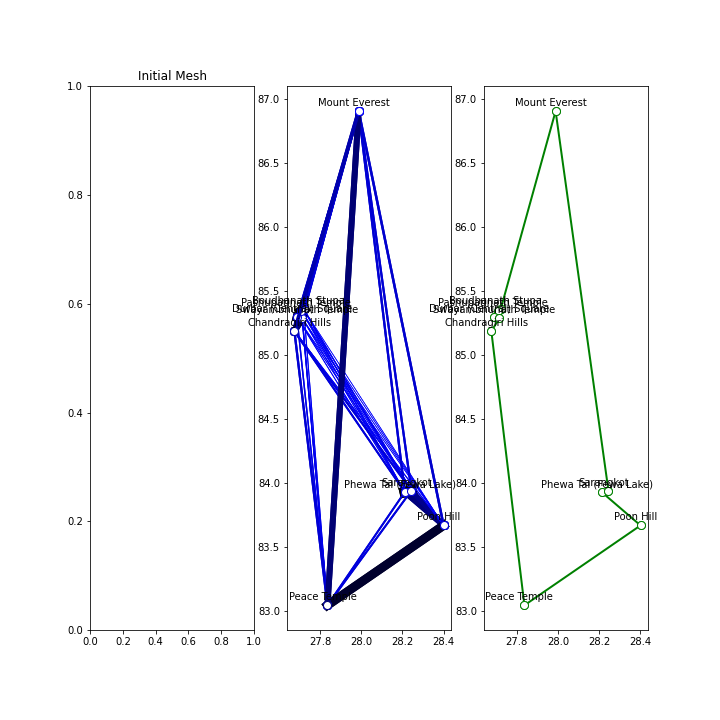

Iteration #0:
Best fitness:  8.127265892822695
Best tour:  [6, 0, 7, 3, 8, 5, 4, 2, 1, 9, 6]
Iteration #1:
Best fitness:  8.127265892822695
Best tour:  [6, 0, 7, 3, 8, 5, 4, 2, 1, 9, 6]
Iteration #2:
Best fitness:  8.102717469369646
Best tour:  [5, 4, 1, 2, 9, 0, 6, 3, 7, 8, 5]
Iteration #3:
Best fitness:  8.102717469369646
Best tour:  [5, 4, 1, 2, 9, 0, 6, 3, 7, 8, 5]
Iteration #4:
Best fitness:  8.102717469369646
Best tour:  [5, 4, 1, 2, 9, 0, 6, 3, 7, 8, 5]
Iteration #5:
Best fitness:  8.102717469369646
Best tour:  [5, 4, 1, 2, 9, 0, 6, 3, 7, 8, 5]
Iteration #6:
Best fitness:  8.102717469369646
Best tour:  [5, 4, 1, 2, 9, 0, 6, 3, 7, 8, 5]
Iteration #7:
Best fitness:  8.093259727253736
Best tour:  [5, 4, 1, 2, 9, 0, 6, 7, 3, 8, 5]
Iteration #8:
Best fitness:  8.093259727253736
Best tour:  [5, 4, 1, 2, 9, 0, 6, 7, 3, 8, 5]
Iteration #9:
Best fitness:  8.093259727253736
Best tour:  [5, 4, 1, 2, 9, 0, 6, 7, 3, 8, 5]
Best tour obtained:
Peace Temple--->Poon Hill--->Phewa Tal (Fewa Lake)

In [55]:
# Main loop

best_fitness=np.inf
best_tour=[]

%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.title.set_text('Initial Mesh')
ax2.title.set_text('Pheromone Graph Plot')
ax3.title.set_text('Best Tour Plot')
plt.ion()

# plt.title("Pheromone graph plot:")
fig.show()
fig.canvas.draw()

# let's draw the initial graph (mesh) first
# plot_graph(ax1,fig)

for i in range(max_iter):
    # create ant colony
    colony=[] # store it as a list
    colony=create_colony(graph,n,ant_no,tau,eta,alpha,beta)
    print(f"Iteration #{i}:")
#     print(colony)
    
    # initializing fitness_list
    fitness_list=[0]*ant_no
    
    # calculate the fitness value of all ants
    for ant_i in range(ant_no):
        fitness_list[ant_i]=fitness_function(colony[ant_i],graph)
        
#     print(fitness_list)
    
    # find the best ant 
    min_value=np.min(fitness_list)
    min_index=np.argmin(fitness_list) #best ant
    
    if min_value<best_fitness:
        # replace best_fitness even smaller min_value is found
        best_fitness=min_value
        best_tour=colony[min_index] #tour of the best ant
        
    print("Best fitness: ",best_fitness)
    print("Best tour: ",best_tour)
    
    # update phermone matrix
    tau=update_pheromone(tau,colony,fitness_list)
    
    # print("Updated pheromone matrix:",tau)
    
    # apply evaporation
    tau=(1-rho)*tau
    
    # print("Updated pheromone matrix:",tau)
    
    # plot the pheromone graph
    # draw_pheromone(ax2,fig,tau,graph)
    
    # plot the best tour
    # draw_best_tour(ax3,fig,best_tour,graph)

#     plt.subplot(1,3,1)
#     %matplotlib tk
#     plt.figure(1)
    
#     draw_pheromone(tau,graph)

    
    
# drawing the best tour plot 
draw_best_tour(ax3,fig,best_tour,graph)

# drawing end pheromone graph
draw_pheromone(ax2,fig,tau,graph)

# display the names of destinations in the last tour
print("Best tour obtained:")

for i in best_tour:
    print(top_n_dests.iloc[i]["title"],end='')
    print("--->",end='')

In [54]:
# plt.savefig('sample.png')